Load Julia packages (libraries) needed

In [26]:
using StatisticalRethinking
using StatsFuns, Optim, Turing, Flux.Tracker

Turing.setadbackend(:reverse_diff)

:reverse_diff

### snippet 2.8t

Define the data

In [27]:
k = 6; n = 9;

Define the model

In [28]:
@model globe_toss(n, k) = begin
  theta ~ Beta(1, 1) # prior
  k ~ Binomial(n, theta) # model
  return k, theta
end;

Compute the "maximum_a_posteriori" value

Set search bounds

In [29]:
lb = [0.0]; ub = [1.0];

Create (compile) the model

In [30]:
model = globe_toss(n, k);

Compute the maximum_a_posteriori

In [31]:
result = maximum_a_posteriori(model, lb, ub)

Results of Optimization Algorithm
 * Algorithm: Fminbox with L-BFGS
 * Starting Point: [0.8580827770764253]
 * Minimizer: [0.6666666665842997]
 * Minimum: 1.297811e+00
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 6.37e-08 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 6.36e-14 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 2.60e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 55
 * Gradient Calls: 55

Use Turing mcmc

In [32]:
chn = sample(model, NUTS(1000, 0.65));

┌ Info: [Turing] looking for good initial eps...
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/samplers/support/hmc_core.jl:246
[NUTS{Any}] found initial ϵ: 0.8
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/samplers/support/hmc_core.jl:291
┌ Warning: Numerical error has been found in gradients.
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/core/ad.jl:114
┌ Warning: grad = [NaN]
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/core/ad.jl:115
┌ Warning: Numerical error has been found in gradients.
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/core/ad.jl:114
┌ Warning: grad = [NaN]
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/core/ad.jl:115
┌ Warning: Numerical error has been found in gradients.
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/core/ad.jl:114
┌ Warning: grad = [NaN]
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/core/ad.jl:115
┌ Info:  Adapted ϵ = 1.0488097299922312, std = [1.0]; 500 iterations is used for a

[NUTS] Finished with
  Running time        = 0.3796610129999993;
  #lf / sample        = 0.005;
  #evals / sample     = 7.015;
  pre-cond. metric    = [1.0].


Look at the generated draws (in chn)

In [33]:
describe(chn[:theta])

Summary Stats:
Mean:           0.634115
Minimum:        0.261509
1st Quartile:   0.545988
Median:         0.639290
3rd Quartile:   0.738392
Maximum:        0.951786
Length:         1000
Type:           Float64


Compute at hpd region

In [34]:
bnds = MCMCChain.hpd(chn[:theta], alpha=0.05);

analytical calculation

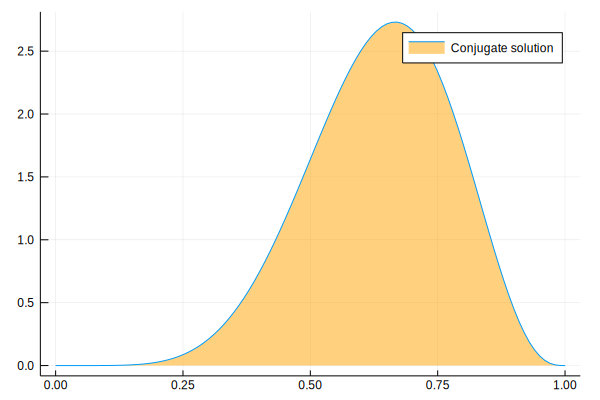

In [35]:
w = 6
n = 9
x = 0:0.01:1
plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), fill=(0, .5,:orange), lab="Conjugate solution")

quadratic approximation

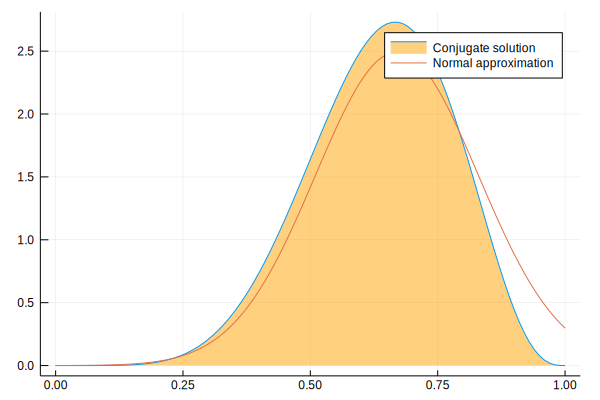

In [36]:
plot!( x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")

Turing Chain &  89%hpd region boundaries

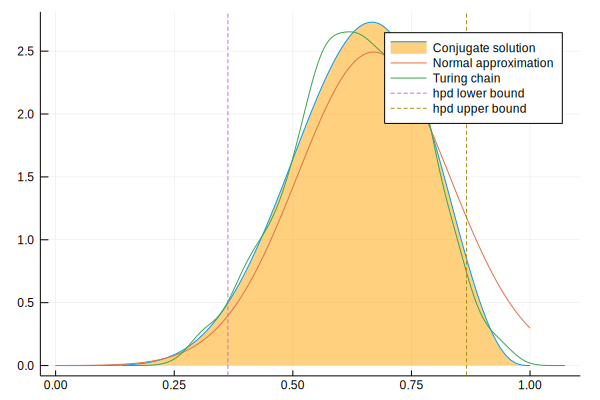

In [37]:
density!(chn[:theta], lab="Turing chain")
vline!([bnds[1]], line=:dash, lab="hpd lower bound")
vline!([bnds[2]], line=:dash, lab="hpd upper bound")

Show hpd region

In [38]:
println("hpd bounds = $bnds\n")

hpd bounds = [0.363111, 0.866173]



*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*